# Random Sample Imputation

In [5]:
# we will replace the NAN values with random sampling

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\user\Desktop\data\Titanic Dataset\titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
df['Age'].isnull().sum()

177

In [37]:
# To ceate this random values for the age
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0) # In this format you can also use 117

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
# To get the indexes of the null values
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [30]:
def impute_nan(df, variable, median):
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    # We will have the random sample to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    #Pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    # For the merging purpose
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [31]:
median = df.Age.median()

In [32]:
impute_nan(df, 'Age', median)

In [33]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

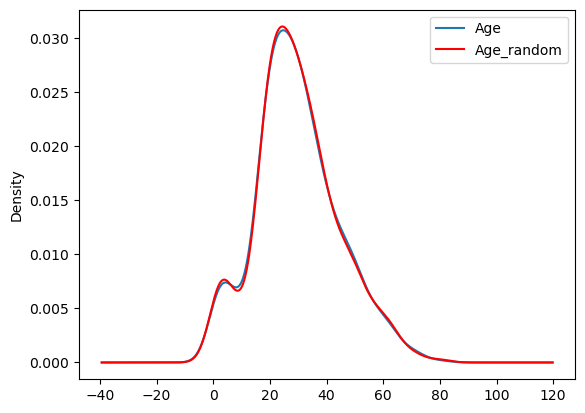

In [38]:
#kde- common  density estimators
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_random.plot(kind = 'kde', color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

# 3. Capturing NaN values with a new feature or variable

It works well if the data are not missing at random

In [40]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\user\Desktop\data\Titanic Dataset\titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
# What i just did is that i replaced the null values with 1 and those with no null values to be 0
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


- It captures the importance of missing values
- After imputation of such, you can later replace others with median, mode or random values, ut the fact that there is missing values, it doesnt change due to the new column that is created"

# End of Distribution Imputation
It is used for Missing Completely At Random Dataset

In [49]:
import pandas as pd
df = pd.read_csv(r'C:\Users\user\Desktop\data\Titanic Dataset\titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


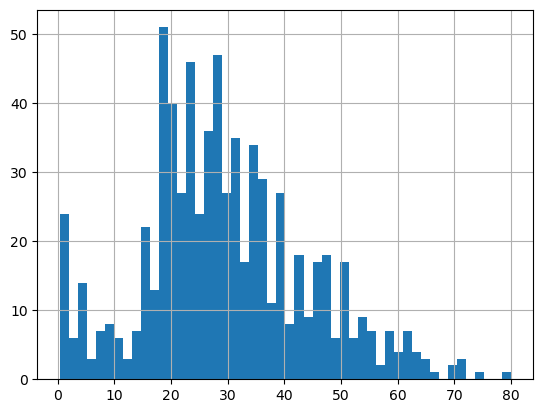

In [63]:
plt.grid(True)
plt.hist(df['Age'], bins = 50)
plt.show()

In [81]:
extreme = df.Age.mean() + 3 * df.Age.std()

<Axes: xlabel='Age'>

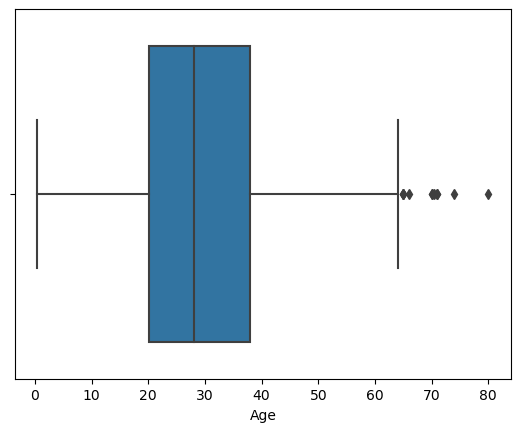

In [82]:
# To get the far end distribution
import seaborn as sns
sns.boxplot(x = 'Age', data = df)

In [83]:
def impute_nan(df, variable, median, extreme):
    df[variable + "_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [84]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [86]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

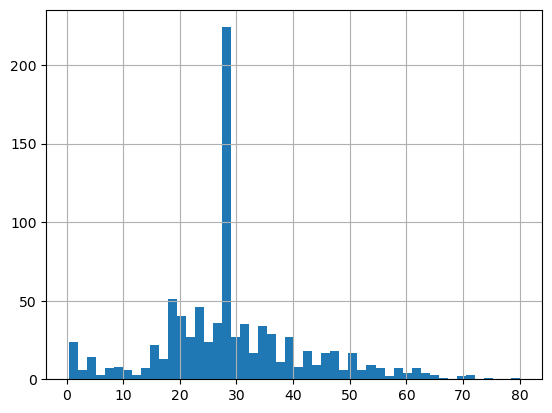

In [88]:
df['Age'].hist(bins = 50)

<Axes: >

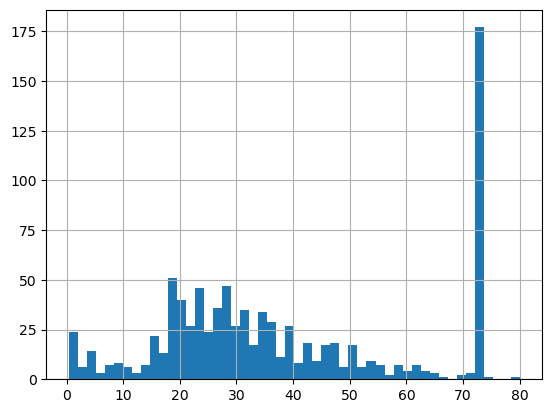

In [90]:
df['Age_end_distribution'].hist(bins = 50)

<Axes: xlabel='Age_end_distribution'>

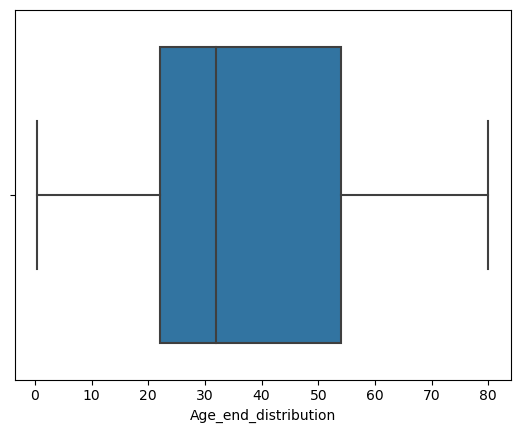

In [92]:
sns.boxplot(x ='Age_end_distribution', data = df)